Yet another 10,000 foot view @ [`https://github.com/squillero/10k`](https://github.com/squillero/10k)  
Copyright **©** 2022 Giovanni Squillero `<squillero@polito.it>`  
Free for personal or classroom use; see the [license](https://github.com/squillero/10k/blob/main/LICENSE.md) for details.  

------------------------------------------------------------

# Sympy Neural Network Demo

In [31]:
from itertools import count
import numpy as np
import sympy
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [32]:
sympy.init_printing(forecolor="black")

In [33]:
def sigmoid(x):
    return 1 / (1 + sympy.exp(-x))

## Simple, 1-feature Problem

### Dataset

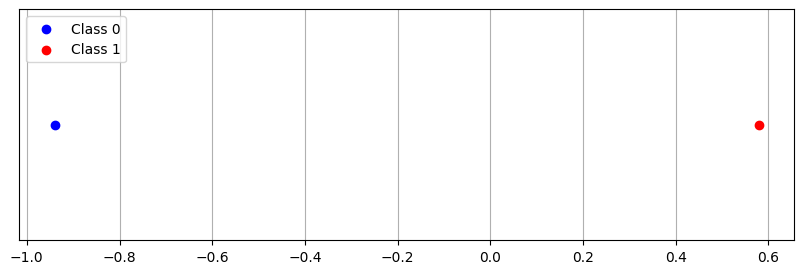

In [34]:
POINTS = 1
SCALE = 0.5

class0 = np.around(np.random.normal(loc=-1, scale=SCALE, size=POINTS), decimals=2)
class1 = np.around(np.random.normal(loc=1, scale=SCALE, size=POINTS), decimals=2)
plt.figure(figsize=(10, 3))
plt.scatter(x=class0, y=np.zeros(POINTS), c="blue", label="Class 0")
plt.scatter(x=class1, y=np.zeros(POINTS), c="red", label="Class 1")
plt.legend(loc="upper left")
plt.grid(axis="x")
plt.gca().get_yaxis().set_visible(False)

## The Neural Network

A kind of good old *perceptron* using a sigmoid

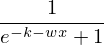

In [35]:
x_, k_, w_ = sympy.symbols("x k w")
val = w_ * x_ + k_
nn = sigmoid(val)
nn

Now pick a *loss function* and use it to calculate the actual loss

In [36]:
def loss_function(v, e):
    return (v - e) ** 2

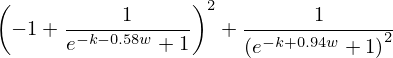

In [37]:
loss = 0
for x in class0:
    loss = loss + loss_function(nn.subs(x_, x), 0)
for x in class1:
    loss = loss + loss_function(nn.subs(x_, x), 1)

loss

Plot the loss as a function of *k* and *w*

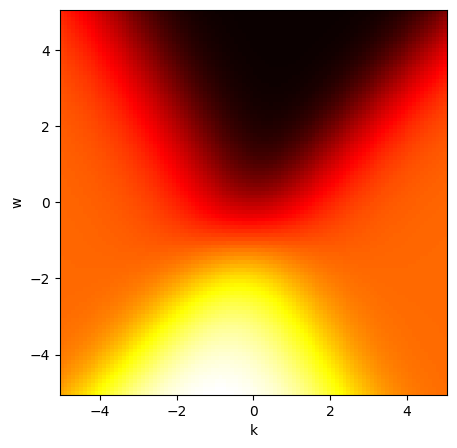

In [38]:
RANGE = 5
plt.figure(figsize=(5, 5))
t = np.linspace(-RANGE, RANGE, 100)
K, W = np.meshgrid(t, t)
loss_f = sympy.lambdify((k_, w_), loss)
plt.xlabel("k")
plt.ylabel("w")
plt.pcolormesh(K, W, loss_f(K, W), cmap="hot")
None

### Train

That is, minimize the loss through simple gradient descent

In [39]:
grad = sympy.derive_by_array(loss, (k_, w_))
grad_f = sympy.lambdify((k_, w_), grad)

 1: [1.19844885 7.0319951 ] -> loss = 4.5577978835216136e-05 / grad = [-1.20536732e-05 -6.67759438e-05]
 2: [1.19838332 7.03163452] -> loss = 4.560285371039763e-05 / grad = [-1.20603225e-05 -6.68122841e-05]
 3: [1.19846868 7.03210621] -> loss = 4.557032130592612e-05 / grad = [-1.20516908e-05 -6.67647450e-05]


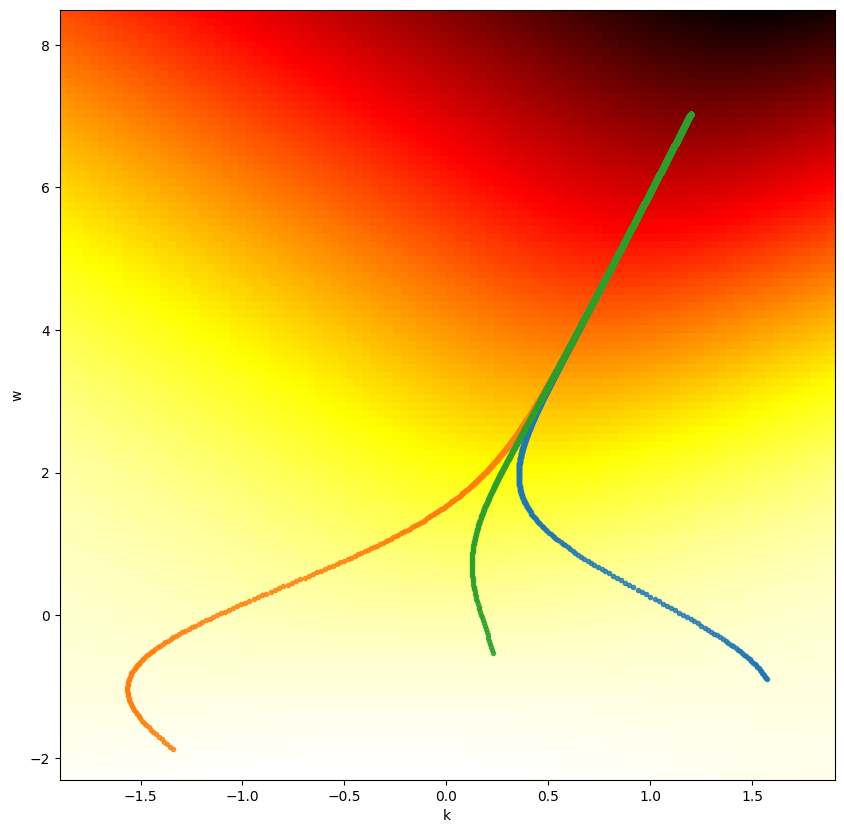

In [40]:
LEARNING_RATE = 0.1

minx, miny = 0, 0
maxx, maxy = 0, 0
paths = list()
for lines in range(3):
    points = [np.random.random(2) * RANGE - RANGE / 2]
    for step in range(100_000):
        p = points[-1]
        minx, miny = min(minx, p[0]), min(miny, p[1])
        maxx, maxy = max(maxx, p[0]), max(maxy, p[1])
        l = np.array(loss_f(*p))
        g = np.array(grad_f(*p))
        points.append(p - LEARNING_RATE * g)
    paths.append(np.array(points))
    print(f"{lines+1:2d}: {np.array(p)} -> loss = {l} / grad = {g}")

plt.figure(figsize=(10, 10))
x = np.linspace(minx * 1.2, maxx * 1.2, 100)
y = np.linspace(miny * 1.2, maxy * 1.2, 100)
X, Y = np.meshgrid(x, y)
plt.pcolormesh(X, Y, np.log(loss_f(X, Y)), cmap="hot")
for p in paths:
    plt.scatter(x=p[:, 0], y=p[:, 1], color=None, marker=".", alpha=0.8)

plt.xlabel("k")
plt.ylabel("w")
None

### The *trained* network

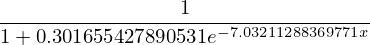

In [41]:
nn_fitted = nn.subs([(k_, paths[-1][-1][0]), (w_, paths[-1][-1][1])])
nn_fitted_f = sympy.lambdify(x_, nn_fitted)

nn_fitted

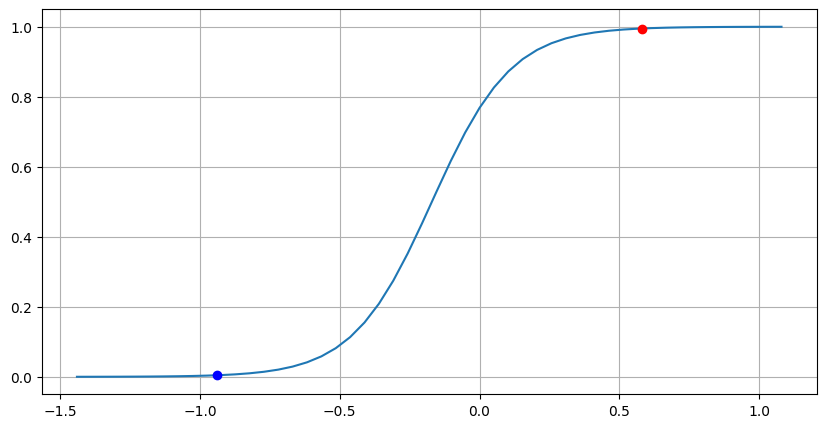

In [42]:
x = np.linspace(min(class0.min(), class1.min()) - 0.5, max(class0.max(), class1.max()) + 0.5)
plt.figure(figsize=(10, 5))
plt.plot(x, nn_fitted_f(x))
for p in class0:
    plt.plot(p, nn_fitted_f(p), marker="o", color="blue")
for p in class1:
    plt.plot(p, nn_fitted_f(p), marker="o", color="red")
plt.grid()
None

## Simple, 2-feature Problem, Single Neuron

### Dataset

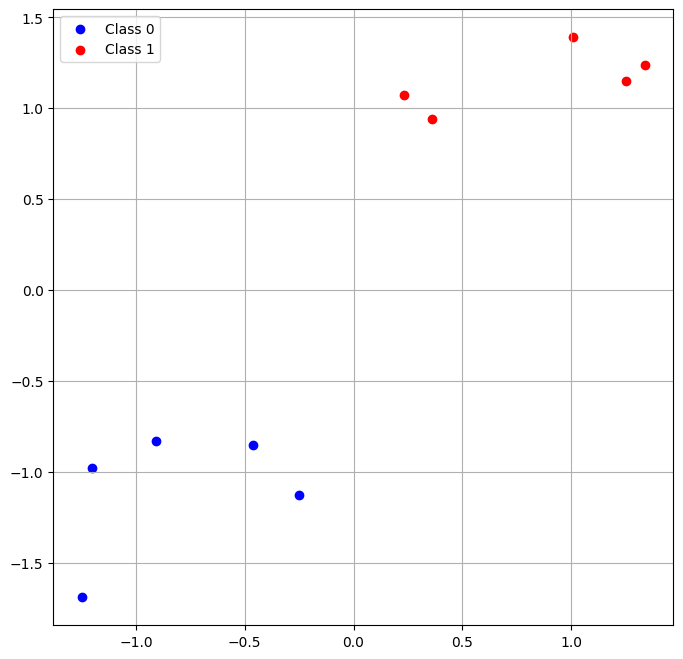

In [43]:
POINTS = 10
SCALE = 0.5
class0 = np.around(np.random.normal(loc=-1, scale=SCALE, size=(POINTS // 2, 2)), decimals=2)
class1 = np.around(np.random.normal(loc=1, scale=SCALE, size=(POINTS // 2, 2)), decimals=2)
plt.figure(figsize=(8, 8))
plt.scatter(x=class0[:, 0], y=class0[:, 1], c="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], c="red", label="Class 1")
plt.legend(loc="upper left")
plt.grid()
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

## The Neural Network

Yet again *perceptron*-like

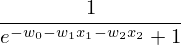

In [44]:
X1, X2, W0, W1, W2 = sympy.symbols("x_1 x_2 w_0 w_1 w_2")
p1 = W0 + W1 * X1 + W2 * X2
nn = 1 / (1 + sympy.exp(-p1))
nn

Let's use a better *loss function* and use it to calculate the actual loss

In [45]:
def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)


# Alt: return -(e * sympy.log(v) + (1 - e) * sympy.log(1 - v))

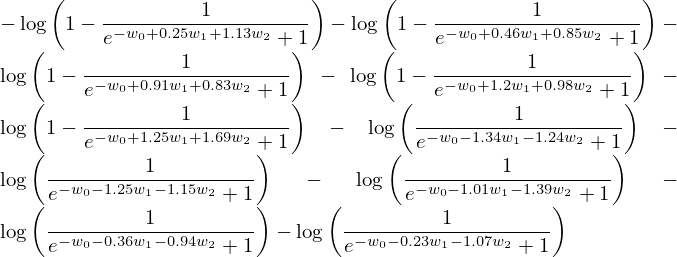

In [46]:
loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss
loss_f = sympy.lambdify((W0, W1, W2), loss)
loss

### Train

Minimize the loss using a smarter function from scipy

In [47]:
start = np.random.random(3) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [-0.44304271  2.4734201  13.07322893]


### The *trained* network

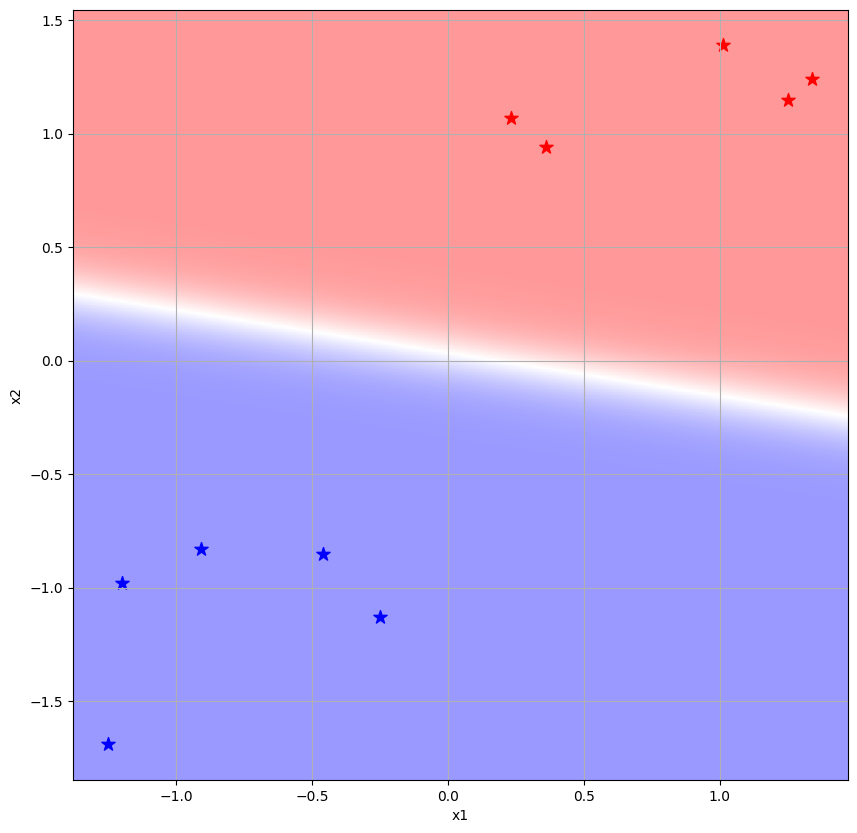

In [48]:
w0, w1, w2 = fit.x
nn_f = sympy.lambdify((X1, X2), nn.subs([(W0, w0), (W1, w1), (W2, w2)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")

None

## More complex, 2-feature Problem

### Dataset

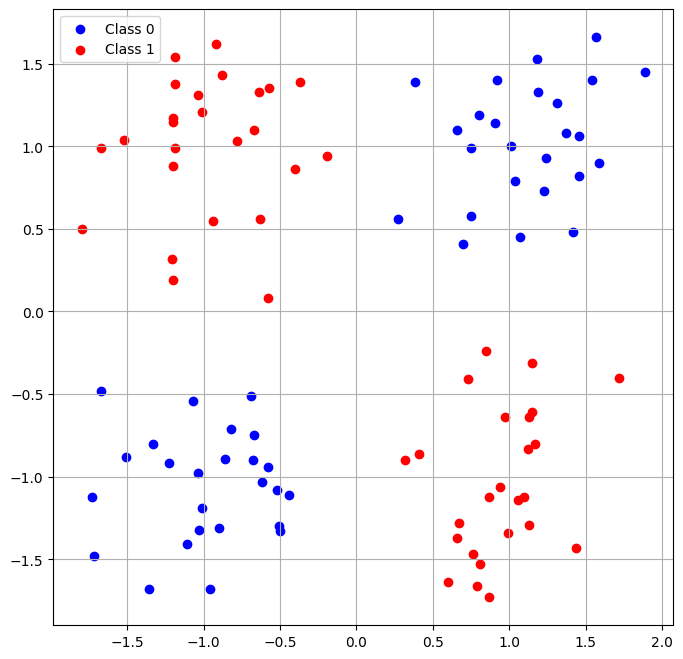

In [57]:
POINTS = 100
SCALE = 0.4
class0 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, -1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, 1],
        ]
    ),
    decimals=2,
)
class1 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, 1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, -1],
        ]
    ),
    decimals=2,
)
plt.figure(figsize=(8, 8))
plt.scatter(x=class0[:, 0], y=class0[:, 1], c="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], c="red", label="Class 1")
plt.legend()
plt.grid()
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

## The Neural Network

A *multilayer perceptron* with one hidden layer

In [58]:
X1, X2 = sympy.symbols("x_1 x_2")
WEIGHT = (sympy.symbols(f"w{t}") for t in count(0))

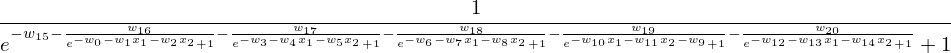

In [59]:
hidden = list()
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))

nn = next(WEIGHT)
for p in hidden:
    nn += next(WEIGHT) * p
nn = sigmoid(nn)
nn

Calculate the actual loss

In [60]:
def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)


loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Weights: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Weights: [w0, w1, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w2, w20, w3, w4, w5, w6, w7, w8, w9]


### Train

Minimize the loss using a smarter function from scipy

In [63]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [ 32.30901352 -15.3508731   75.52078829 -86.91708914  13.39834249
  57.44370827  -9.22710503  16.77805989 -37.27051757  10.4941401
  50.30040749  72.7517064   15.25373147 -47.01588488 -45.2422951
 -50.10500361 -18.43983396  45.00165482  35.83744504  49.11375195
 -85.37189179]


### The *trained* network

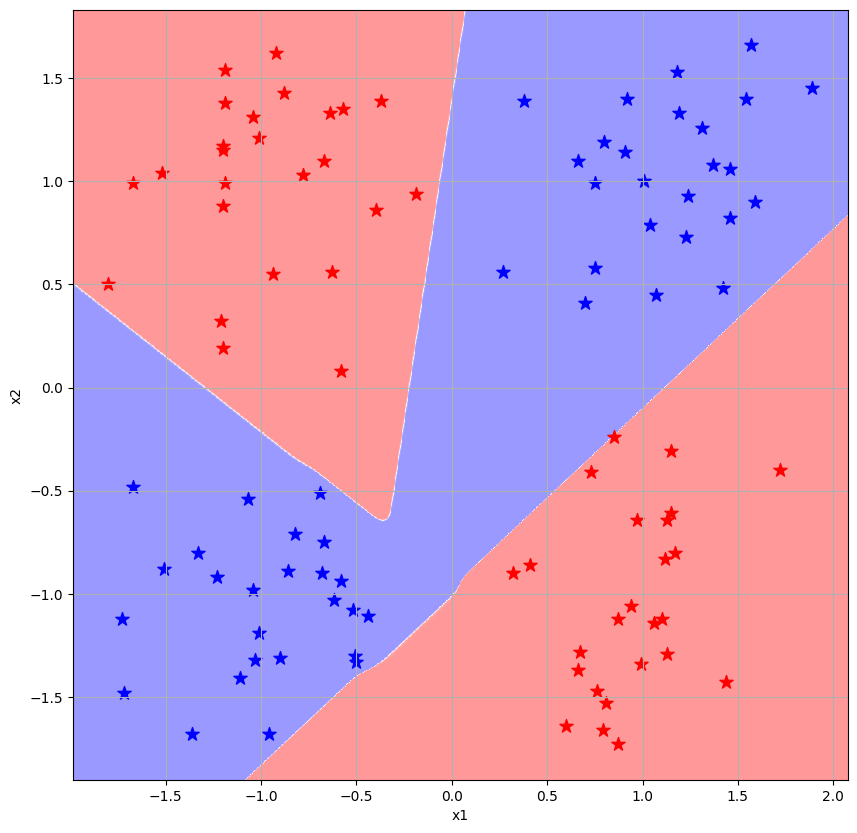

In [65]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")
None

## The Neural Network (alternative)

Again, one single neuron, but with extra inputs

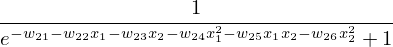

In [66]:
nn = sigmoid(
    next(WEIGHT)
    + next(WEIGHT) * X1
    + next(WEIGHT) * X2
    + next(WEIGHT) * X1**2
    + next(WEIGHT) * X1 * X2
    + next(WEIGHT) * X2**2
)
nn

Calculate the actual loss

In [67]:
def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)


loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Weights: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Weights: [w21, w22, w23, w24, w25, w26]


### Train

Minimize the loss using a smarter function from scipy

In [68]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [   2.51788657   45.00604437   72.42008942   19.97525245 -435.68790402
    7.38492409]


<lambdifygenerated-22>:2: RuntimeWarning: overflow encountered in exp
  return -1/100*log(1 - 1/(exp(-w21 - 1.89*w22 - 1.45*w23 - 3.5721*w24 - 2.7405*w25 - 2.1025*w26) + 1)) - 1/100*log(1 - 1/(exp(-w21 - 1.59*w22 - 0.9*w23 - 2.5281*w24 - 1.431*w25 - 0.81*w26) + 1)) - 1/100*log(1 - 1/(exp(-w21 - 1.57*w22 - 1.66*w23 - 2.4649*w24 - 2.6062*w25 - 2.7556*w26) + 1)) - 1/100*log(1 - 1/(exp(-w21 - 1.54*w22 - 1.4*w23 - 2.3716*w24 - 2.156*w25 - 1.96*w26) + 1)) - 1/100*log(1 - 1/(exp(-w21 - 1.46*w22 - 1.06*w23 - 2.1316*w24 - 1.5476*w25 - 1.1236*w26) + 1)) - 1/100*log(1 - 1/(exp(-w21 - 1.46*w22 - 0.82*w23 - 2.1316*w24 - 1.1972*w25 - 0.6724*w26) + 1)) - 1/100*log(1 - 1/(exp(-w21 - 1.42*w22 - 0.48*w23 - 2.0164*w24 - 0.6816*w25 - 0.2304*w26) + 1)) - 1/100*log(1 - 1/(exp(-w21 - 1.37*w22 - 1.08*w23 - 1.8769*w24 - 1.4796*w25 - 1.1664*w26) + 1)) - 1/100*log(1 - 1/(exp(-w21 - 1.31*w22 - 1.26*w23 - 1.7161*w24 - 1.6506*w25 - 1.5876*w26) + 1)) - 1/100*log(1 - 1/(exp(-w21 - 1.24*w22 - 0.93*w23 - 1.5376*w24 - 1

### The *trained* network

<lambdifygenerated-23>:2: RuntimeWarning: overflow encountered in exp
  return (0.0806298323323321*exp(-19.9752524494729*x_1**2 + 435.687904024435*x_1*x_2 - 45.0060443698915*x_1 - 7.38492409437418*x_2**2 - 72.4200894244647*x_2) + 1)**(-1.0)


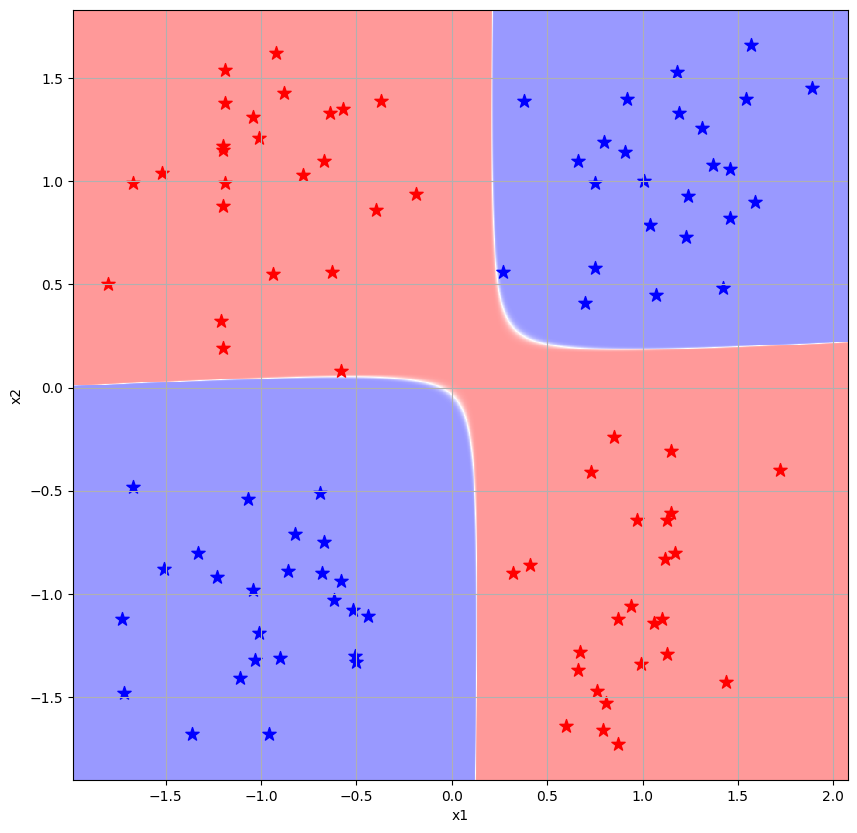

In [69]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")
None